# 보스톤 집값 예측

## 데이터 불러오기

In [1]:
## 필요한 라이브러리 임포트
import pandas as pd

In [2]:
## DataFrame생성

# 파일 경로 설정
file_path = '/content/drive/MyDrive/데이터분석/데이터/house_price.csv'
# pd.read_csv() 사용
df = pd.read_csv(file_path)
# 결과 확인하기
print(df)

# 아래 내용에서 Unnamed: 0이 생긴다.
# df.to_csv 할때 index를 뺐어야 했다.
# 삭제해도 되지만, 불러올때,
# index_col이라는 매개변수에서 특정 col을 index로 지정하는 기능을 이용하여 index를 설정
# index_col= 0 을 쓰면 아래 Unnamed: 0이 index로 가면서 빠져버린다.
# index 자체를 없앨 수는 없다.
# 다음셀과 같이하면 된다.

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio       b  lstat  medv 

In [3]:
# 이렇게 불러온다.
# index 자체는 없앨 수 없다. 라고 강사가 설명함. 맞나?
df = pd.read_csv(file_path, index_col = 0)   # 그래서 index_col = 0은 아주 유용한 tip이다.
print(df)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

## 데이터 전처리

### 누락 데이터 처리

In [4]:
### 각 컬럼별 누락 데이터의 수 확인
num_nulls = df.isnull().sum()
print(num_nulls)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


### 이상치 처리

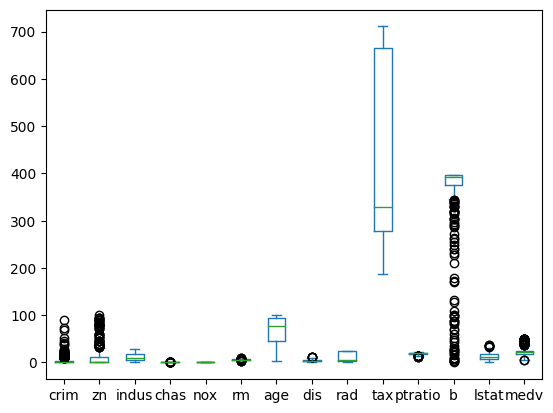

In [5]:
### boxplot을 이용한 이상치 시각화

# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt

# 시각화
df.plot(kind = 'box')  # 이렇게 하면 스케일이 하나로 나와서 보기가 쉽지 않다.
plt.show()

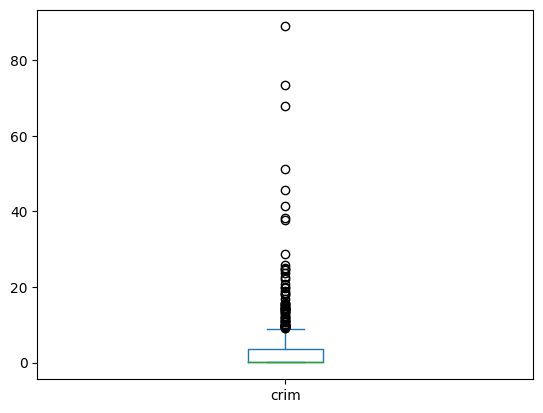

In [6]:
# 위의꺼가 보기 편하지 않아서 crim 칼럼 하나만 보면 아래와 같다.
df.loc[:,'crim'].plot(kind = 'box')
plt.show()

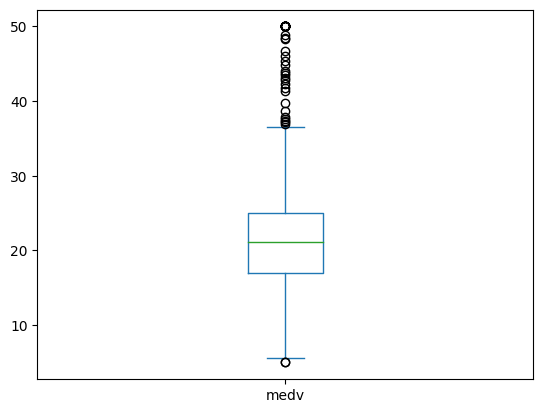

In [7]:
# 가격만 보면?
df.loc[:,'medv'].plot(kind = 'box')
plt.show()

# 아래와 같이 이상치가 나오는데, 주택가격이 이상치가 나오면 (싼집, 고가주택 등의 차이) 이를 버려야 하나?
# 적어도 가격과 관련해서는 그건 아니다. 이상치가 당연할 수 있다.
# 이상치는 제거하지 않고 그냥 하기로 해본다.

In [8]:
# 모든 데이터에 대해
# 후진소거법 / 전진선택법 을 이용해서 변수를 하나씩 빼보거나 하나씩 더해본다.

## EDA(탐색적 데이터 분석)

### 주택 가격과 crim컬럼의 관계 분석

In [9]:
### crim 컬럼의 분포 확인

In [10]:
### crim 컬럼과 주택가격과의 상관분석

# 정답도 가격, 컬럼도 비율(둘다 숫자, 연속형) 이를 이용하여 분석하는 방법은
# 상관관계 분석 가능

result = df.loc[:,['crim','medv']].corr()
print(f'주택가격과 crim칼럼의 상관분석의 결과 : \n{result}')

주택가격과 crim칼럼의 상관분석의 결과 : 
          crim      medv
crim  1.000000 -0.388305
medv -0.388305  1.000000


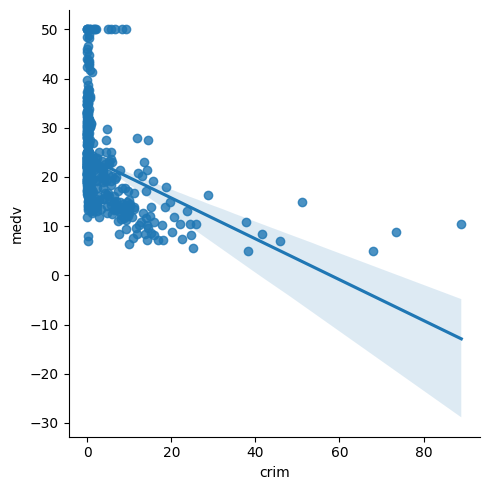

In [11]:
# lmplot -> seaborn에서 제공하는 선형회귀 그래프
# lmplot을 이용한 분석
import seaborn as sns

# lmplot 사용
sns.lmplot(data = df, x = 'crim', y = 'medv')

# lmplot : 산점도 그래프를 기본으로 하고, 기본적인 상관관계를 추론할 수 있는 그래프를 제공

<Axes: xlabel='crim', ylabel='Count'>

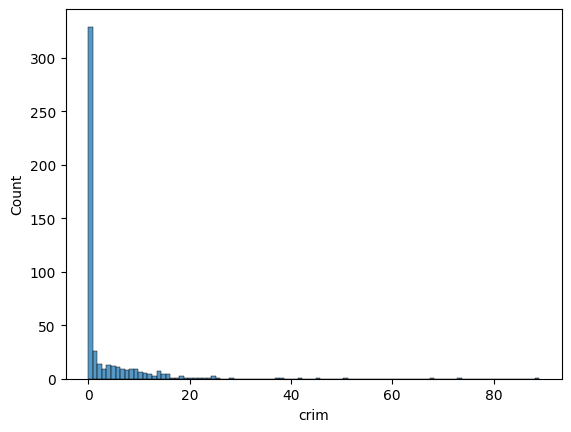

In [12]:
# histplot() 사용
sns.histplot(data = df, x = 'crim')

### 주택 가격과 rm 컬럼의 관계 분석

<Axes: xlabel='rm', ylabel='Count'>

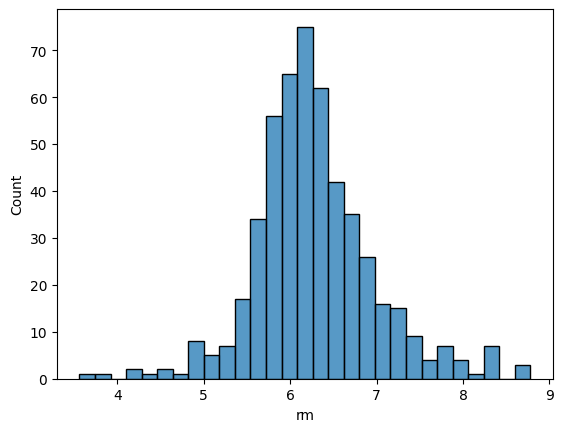

In [13]:
### rm컬럼의 분포 시각화
sns.histplot(data = df, x = 'rm')

In [14]:
### 주택가격과 rm컬럼의 상관분석
result = df.loc[:,['rm','medv']].corr()
print(f'주택 가격과 rm컬럼의 상관 분석 \n{result}')

주택 가격과 rm컬럼의 상관 분석 
           rm     medv
rm    1.00000  0.69536
medv  0.69536  1.00000


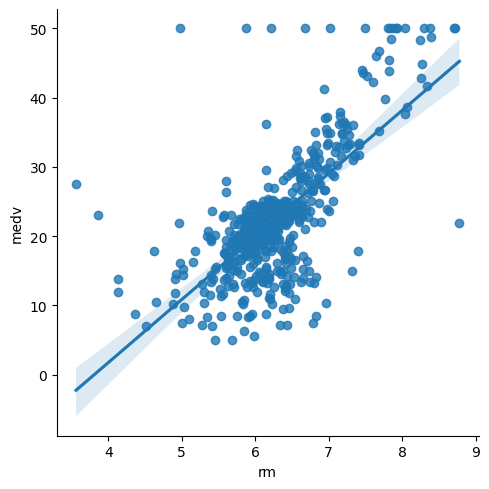

In [15]:
### lmplot()함수를 이용한 분석
sns.lmplot(data = df, x = 'rm', y = 'medv')

## 트리기반의 회귀 모델링

### 학습용 데이터와 평가용 데이터 생성

In [16]:
### 75:25의 비율로 학습용 데이터와 평가용 데이터 생성

# 필요한 함수 임포트
from sklearn.model_selection import train_test_split

# X_data 생성
X_data = df.drop(columns = ['medv'])
print(f'X_data 확인 : \n{X_data}')
print('-'*80)

# y_data 생성
y_data = df.loc[:,'medv']
print(f'y_data 확인 : \n{y_data}')

X_data 확인 : 
        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83

In [17]:
# train_test_split() 사용
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 0)

In [18]:
### 학습용 데이터의 인덱스 확인
print(X_train.index)
print('-'*80)
print(y_train.index)

Index([245,  59, 276, 395, 416, 491, 170, 419,  55, 235,
       ...
       211,   9, 359, 195, 251, 323, 192, 117,  47, 172],
      dtype='int64', length=379)
--------------------------------------------------------------------------------
Index([245,  59, 276, 395, 416, 491, 170, 419,  55, 235,
       ...
       211,   9, 359, 195, 251, 323, 192, 117,  47, 172],
      dtype='int64', length=379)


### DecisionTree 회귀모델을 이용한 주택 가격 예측

#### best 모델 생성

In [21]:
### GridSearchCV 함수 설정

# 필요한 함수 임포트
from sklearn.model_selection import GridSearchCV
from sklearn.tree            import DecisionTreeRegressor

# 최적화할 기본 모델 설정
dt = DecisionTreeRegressor(random_state = 0)

# 최적화할 매개변수 설정
params = {'max_depth': [3,4,5,6,7,8,9,10]}

# GridSearchCV 함수 호출, 모델 객체 생성
grid_dt = GridSearchCV(
    estimator = dt,
    param_grid = params,
    scoring = 'neg_mean_squared_error',         # negative라는 접두어를 붙여줘야 한다.
    cv = 10
)

# scoring에 분류때는 accuracy를 넣었는데, 이는 숫자가 높을 수록 성능이 좋다고 나옴.
# mean_squared_error일 때는 낮을 수록 성능이 높은 것임.
# 이 둘간의 불일치의 방향성을 맞추기 위해서 neg를 붙임.

# 학습 및 평가
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [22]:
# `24.6.9. 3개월 2일차 수업

# 보스톤 집값 데이터 분석
# 분류 평가 지표 : precision, recall, f1 score
# 비정형 텍스트 데이터 분석

In [24]:
### 최적의 하이퍼 파라미터 확인
print(grid_dt.best_params_)

{'max_depth': 8}


In [25]:
# 검증용 데이터에 대한 최적의 성능 확인
grid_dt.best_score_  # 음수는 negative가 붙어서 -로 표시

-17.373485647626

In [26]:
### best 모델 생성
best_dt = DecisionTreeRegressor(max_depth = 8, random_state=0)

#### best 모델 학습

In [27]:
best_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=0)

#### 학습결과 시각화

[Text(0.5, 0.9, 'lstat <= 8.13\nsquared_error = 85.308\nsamples = 379\nvalue = 22.609'),
 Text(0.25, 0.7, 'rm <= 7.435\nsquared_error = 75.591\nsamples = 135\nvalue = 31.159'),
 Text(0.125, 0.5, 'rm <= 6.657\nsquared_error = 37.035\nsamples = 112\nvalue = 28.376'),
 Text(0.0625, 0.3, 'dis <= 1.473\nsquared_error = 18.336\nsamples = 58\nvalue = 24.741'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'dis <= 1.626\nsquared_error = 27.691\nsamples = 54\nvalue = 32.28'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'ptratio <= 18.3\nsquared_error = 42.031\nsamples = 23\nvalue = 44.709'),
 Text(0.3125, 0.3, 'crim <= 0.577\nsquared_error = 14.587\nsamples = 21\nvalue = 46.248'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'ptratio <= 19.4\nsquared_error = 44.223\nsamples = 2\nvalue = 28.55'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.46875, 

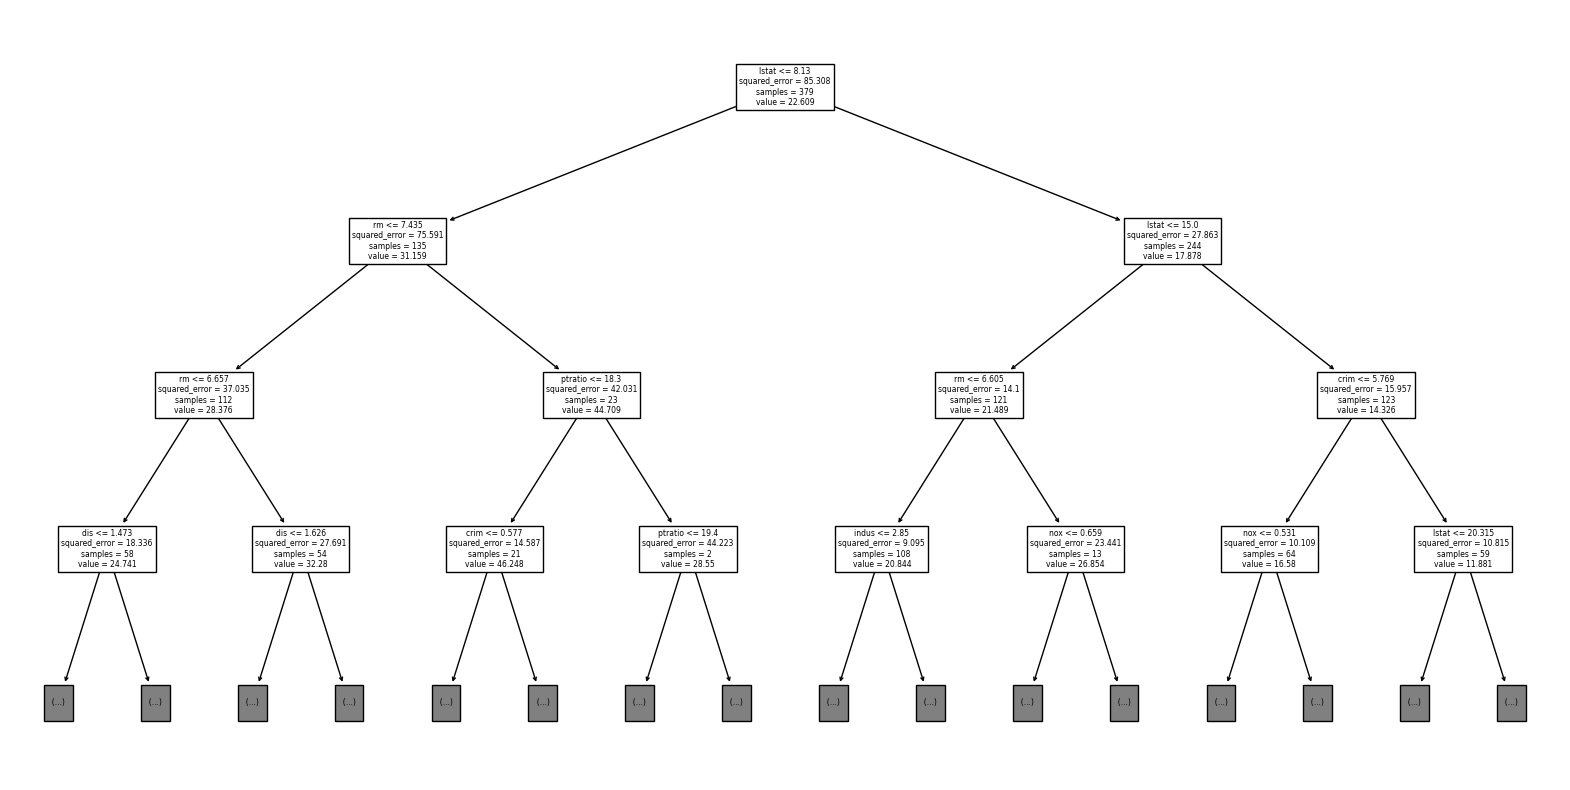

In [34]:
# 시각화 함수 임포트
! pip install scikit-learn

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

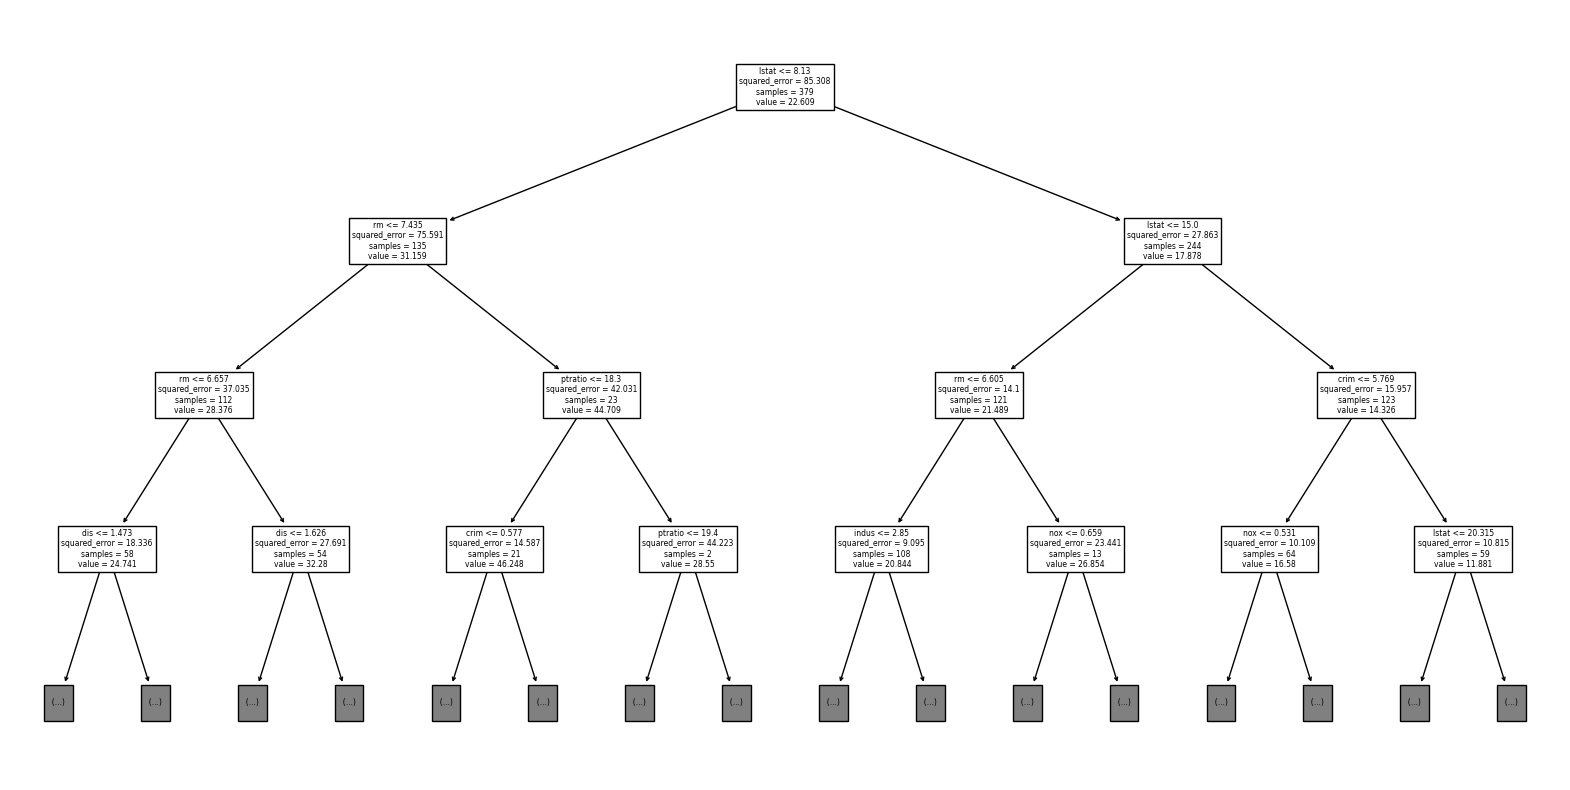

In [38]:
# 이미지 크기 재설정
plt.figure(figsize  = (20,10))

# 그래프 생성 및 출력
plot_tree(decision_tree = best_dt, max_depth = 3, feature_names = X_train.columns)
plt.show()

#### 평가용 데이터를 이용한 예측

In [39]:
y_test.describe()

count    127.000000
mean      22.306299
std        9.074548
min        5.600000
25%       17.150000
50%       21.000000
75%       24.300000
max       50.000000
Name: medv, dtype: float64

In [40]:
pred = best_dt.predict(X_test)
pred

array([23.77692308, 23.56923077, 20.83392857, 16.3       , 20.83392857,
       19.975     , 20.83392857, 20.94      , 20.83392857, 16.1       ,
       11.38571429, 17.9       , 13.91666667,  8.8       , 50.        ,
       33.32307692, 20.83392857, 33.32307692, 22.8       , 19.975     ,
       23.77692308, 20.83392857, 20.83392857, 23.77692308, 20.83392857,
       10.9       , 16.2       , 15.075     , 38.7       , 18.28181818,
       12.85714286, 20.83392857, 23.56923077, 18.57777778, 23.56923077,
       20.83392857, 10.2       , 22.6       , 12.85714286, 17.9       ,
       23.56923077, 20.83392857, 23.56923077, 12.85714286, 22.        ,
       20.94      , 22.2       , 13.95833333, 15.075     , 28.55      ,
       13.95833333, 18.28181818, 20.83392857, 35.2       , 13.95833333,
       19.5       , 18.57777778, 18.57777778, 10.9       , 22.2       ,
       21.8       , 20.83392857, 33.32307692, 22.8       , 20.83392857,
       24.125     , 15.76666667, 19.4       ,  9.45      , 20.83

#### best 모델 평가

In [42]:
# 성능평가는 평균제곱오차로 하는데, 이를 위한 함수를 import
from sklearn.metrics import mean_squared_error as mse

# 평가용 데이터에 대한 성능 평가
result = mse(y_test, pred)

# 결과 확인하기
print(f'평가용 데이터에 대하 성능 : {result}')


평가용 데이터에 대하 성능 : 26.767641767448996


In [43]:
y_test.describe()

count    127.000000
mean      22.306299
std        9.074548
min        5.600000
25%       17.150000
50%       21.000000
75%       24.300000
max       50.000000
Name: medv, dtype: float64

In [47]:
# 결과 평균 22,300 달러짜리 집에서 오차가 5,000정도.. 이 정도의 성능
# 이 결과가 만족스럽지 못하니 앙상블을 써본다.
# random forest (앙상블)을 써본다. -> bagging 방식의 다수결방식
#-> dt.1~~dt.n에 대해서 test1 을 돌려서 나온 결과를 평균을 구한다.

### Random Forest 회귀 모델을 이용한 주택 가격 예측

#### best 모델 생성

In [57]:
### GridSearchCV 함수 실행

# 필요한 함수 임포트
from sklearn.ensemble import RandomForestRegressor

# 최적화 할 기본 모델
rf = RandomForestRegressor(random_state = 0)

# 최적화할 매개변수 설정
params = {'n_estimators':[100,200,300,400],
          'max_depth'   :[3,4,5,6,7,8,9,10]}

# GridSearchCV 함수 호출, 모델 객체 생성
grid_rf = GridSearchCV(
   estimator = rf,
   param_grid = params,
   scoring = 'neg_mean_squared_error',
   cv = 10
)

# 학습 및 평가
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error')

In [59]:
# 최적의 하이퍼파라미터 조합 확인
print(grid_rf.best_params_)

{'max_depth': 10, 'n_estimators': 200}


In [60]:
# best 모델 생성
best_rf = RandomForestRegressor(max_depth = 10, n_estimators = 200, random_state = 0)

#### best 모델 학습

In [61]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=0)

In [ ]:
# random forest 는 black box 모델.. 어떻게 의사결정을 했는지를 알 수가 없다.
# 최근 explainable
# SHAP (shapley value)를 이용해서 random forest 나 light gbm의 의사결정과정을 확인해보는 것도 있다.
# 이런 설명가능한 AI는 미래에 유망한 분야일 수 있다.

# 일런머스크가 만든 인공지능 회사 는 xAI
# xAI의 x가 혹시 explainable 인가? 로 볼 수도 있다.

#### 평가용 데이터를 이용한 예측

In [ ]:
pred_rf = best_rf.predict(X_test)
pred_rf

#### best 모델평가

In [65]:
from sklearn.metrics import mean_squared_error as mse

# 평가용 데이터에 대한 성능 평가
result = mse(y_test, pred_rf)

# 결과 확인하기
print(f'평가용 데이터에 대한 성능 : {result}')

# decision tree 하나만 썼을 때는 25,
# 이 random forest 를 썼을 때 16으로 감소

평가용 데이터에 대한 성능 : 16.872843420686287


In [67]:
print(y_test.describe())
# 오차가 25%에서 20%로 감소

count    127.000000
mean      22.306299
std        9.074548
min        5.600000
25%       17.150000
50%       21.000000
75%       24.300000
max       50.000000
Name: medv, dtype: float64


### LightGBM 회귀 모델을 이용한 주택가격 예측

#### best 모델 생성

In [87]:
### GridSearchCV 함수실행

# 필요한 함수 import
from lightgbm import LGBMRegressor

# 최적화할 기본모델 생성
lgbm  = LGBMRegressor(random_state=0,        # seed가 재현성을 위한 설정
                      bagging_seed=0,
                      feature_fraction_seed=0,
                      data_random_seed=0,
                      drop_seed=0,
                      verbose=-1)            # 학습의 과정이 비활성화 되도록

# 최적화할 매개변수 설정
params = {'learning_rate': [0.01,0.05,0.1,0.2],
          'n_estimators' : [200,250,300,350,400,450,500],
          'max_depth' : [3,4,5,6,7]}

# GridSearchCV 모델 객체 생성
grid_lgbm = GridSearchCV(
    estimator = lgbm,
    param_grid = params,
    scoring = 'neg_mean_squared_error',
    cv = 10
)

# 학습 및 평가
grid_lgbm.fit(X_train, y_train)

# 11초 걸림
# max_depth를 추가하고 나서 33초 걸림

GridSearchCV(cv=10,
             estimator=LGBMRegressor(bagging_seed=0, data_random_seed=0,
                                     drop_seed=0, feature_fraction_seed=0,
                                     random_state=0, verbose=-1),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [200, 250, 300, 350, 400, 450, 500]},
             scoring='neg_mean_squared_error')

In [88]:
### 최적의 하이퍼파라미터 조합 확인
print(grid_lgbm.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}


In [89]:
### best 모델 생성
best_lgbm = LGBMRegressor(learning_rate=0.1,
                          n_estimators = 500,
                          max_depth = 4,
                          random_state=0,
                          bagging_seed=0,
                          feature_fraction_seed=0,
                          data_random_seed=0,
                          drop_seed=0,
                          verbose = -1)

#### best 모델 학습

In [90]:
best_lgbm.fit(X_train, y_train)

LGBMRegressor(bagging_seed=0, data_random_seed=0, drop_seed=0,
              feature_fraction_seed=0, max_depth=4, n_estimators=500,
              random_state=0, verbose=-1)

#### 평가용 데이터에 대한 예측

In [91]:
pred = best_lgbm.predict(X_test)
print(pred)

[23.8841733  29.19079569 23.56370001  9.08950568 20.28085476 19.99802731
 22.49148614 19.5524538  22.66044058 17.84295011  7.71859874 15.14725952
 14.56506846  6.84092672 48.72286263 36.60630517 21.11778735 38.60614085
 26.95491088 22.0201345  23.92876864 22.0233525  19.3615756  27.25597688
 21.64446473 23.41727488 16.99318373 14.6242932  42.82235983 17.84107378
 16.12443126 16.39911568 19.3462119  20.27924143 26.96025442 14.5538053
  6.6027038  25.55846546 13.09622691 13.43825682 23.72862383 22.10317931
 21.22804106 15.47669348 22.14535402 20.26386419 21.08920016 16.36095606
 14.5204281  26.36399897 15.12692759 21.35391214 22.54384891 40.0236406
 12.64667995 19.94138065 19.15656781 18.37231119 21.41038096 20.33176033
 20.74973391 19.96918644 35.194467   30.40340611 18.86468934 26.55727963
 17.04323637 17.79770977 16.6272941  23.9176461  19.66314974 22.07151141
 24.04239645 29.59298718 26.84884887  7.26758935 43.35624991 22.4649044
 23.2467967  20.29409641 25.48009825 17.68103724 20.71

#### best 모델 평가

In [92]:
from sklearn.metrics import mean_squared_error as mse

# 평가용 데이터에 대한 성능 평가
result = mse(y_test, pred)

# 결과 확인하기
print(f'평가용 데이터에 대한 성능 : {result}')

# 이는 decisiontree보다는 좋고, random forest 보다는 낮은 수치.
# 데이터의 숫자가 작아서 그럴 수도 있다.
# 깊이를 변경해서 다시..(원래 깊이는  없었음.
# 20에서 18.5로 떨어짐.

평가용 데이터에 대한 성능 : 18.51494233245623


In [93]:
# 여기서 추가적으로 성능을 개선하고 싶으면
# 후진소거법 등을 적용해볼 수 있다.
# chas 컬럼 한개를 삭제하고 해본다.